# Recursion vs Loops  
## MSDS-432 - Kiley - Week 3 Assignment
### Assignment Overview
The mini-programming assignment requires us to implement and test the performance of a recursive factorial algorithm manually applied in Python.

The algorithm's performance will be measured using Big O notation. <br>
**Big O Notation** is a way to communicate the number of operations required to perform an algorithm in the worst-case scenario.  The number of operations is represented by n.

For both recursive and loop factorial algorithms, the worst-case scenario is also the best case scenario, where the the algorithm must be applied n times as it works through n! .  This requires that the algorithm operate in O(n) time.

This assignment is git controlled.  The repo was prepared using git bash.

# Setting up working environment, define and test key functions
The packages selected in "In[1]" are all the packages required for the subsequent operations. <br>
They are named based on standard python naming conventions.

In [1]:
# Set up working environment
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt

**fact** function leverages code from *Grokking Algorithms*; the code was sourced from github.
https://github.com/egonSchiele/grokking_algorithms/blob/master/03_recursion/python/03_factorial.py


We will define it as a function so that it may be applied to multiple trials consistently and quickly.

In [2]:
# Recursively define factorial
def fact(x):
  if x == 1:
    return 1
  else:
    return x * fact(x-1)

**loop_fact** function leverages code from *the crazy programer*; the code was adapted from the link below.

https://www.thecrazyprogrammer.com/2017/04/python-program-find-factorial-number-using-loop.html


We will define it as a function so that it may be applied to multiple trials consistently and quickly.

In [4]:
# Python program to find the factorial of a number provided by the user.num=6
def loop_fact(num):
    fac = 1
    for i in range(1, num + 1):
        fac = fac * i
    return fac

In [5]:
# Check that algorithm works
print('The results for the recursive method are:', fact(5))
print('The results for the loop method are:', loop_fact(5))
print('The results for the manual method are:', 5*4*3*2*1)

The results for the recursive method are: 120
The results for the loop method are: 120
The results for the manual method are: 120


**Results of the test: The algorithms works as expected.** <br>

The assignment has asked that the algorithms be tested at various values of random numbers between 100 & 500.  
To ensure that the same tests are performed on each data set, a function will be generated to capture the requested tests. 

The requested output are:
* The number being factorized
* The output of the factorization
* Time (in milliseconds) to run

**Note** The factorized value for these requested numbers is too large to be stored in a numpy array.  Becuase of this the resulting output is 0.

These output will be put into a pandas dataframe called "df". 

# Generate And Test Random Data 
The random seed generator provided in the project requirements returned the value 922.<br>
Leveraging a seed as such creates reproducable work.<br>
That seed has been set below.

Per the requirements, using a random number generator with a uniform probabilty of each value occuring generating a single array of a length of 10.  The values are to be between 100 & 500. 

Randomly generated values will be rounded to the nearest whole number to be properly factorialed.


In [6]:
# Set Random Seeds
SEED = np.random.seed(922)

# Create array 1
a1 = list(np.random.randint(100,500,10))

print("The array's values are: ", a1)
print("The array's length is: ", len(a1))
print("The max value in the array is: ", np.max(a1))
print("The min value in the array is: ", np.min(a1))

The array's values are:  [319, 462, 188, 380, 294, 100, 240, 464, 482, 464]
The array's length is:  10
The max value in the array is:  482
The min value in the array is:  100


In [7]:
# Create array 2, basic array to test function
a2 = [1,2,3,4,5,6,7,8,9,10]

print("The array's values are: ", a2)
print("The array's length is: ", len(a2))
print("The max value in the array is: ", np.max(a2))
print("The min value in the array is: ", np.min(a2))

The array's values are:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The array's length is:  10
The max value in the array is:  10
The min value in the array is:  1


Here we define a function to perform the test for both versions of the algorithm.

This ensures that we get consistent output and can quickly iterate through the trials.

In [8]:
def run_trial(method, sel_array):
    # Create an empty list to store results
    fun_results=list([])

    # Create an empty list to store timer results
    fun_timer=list([])

    # Select array to run through the loop
    array=sel_array

    # Loop to run through the array and perform recursive factorial
    # Appends results to results & timer lists

    for x in array:
        start = time.clock()
        fun_results.append(method(x))
        end = time.clock()
        fun_timer.append(round((end - start)*1000,6)) # Convert to milliseconds 
    
    return fun_results, fun_timer


# Run Trials and Create Pandas Data Frame

Most of the work has been completed, this next step passes the generated data to the selected functions defined previously.  The arrays are then summarized into a pandas data frame for further analysis. 

In [20]:
# Run with Recurive Function
results = run_trial(fact, a1)[0]
timer = run_trial(fact, a1)[1]

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in long_scalars
  


In [22]:
# Run with Loop Function
results2 = run_trial(loop_fact, a1)[0]
timer2 = run_trial(loop_fact, a1)[1]

In [23]:
# Create pandas dataframe of trials
df = pd.DataFrame({'number':a1,'factorial':results,
                   'recursive_timer':timer, 'loop_timer':timer2})

# Print pandas dataframe of trials
print(df)

   number  factorial  recursive_timer  loop_timer
0     319          0         0.371393    0.064000
1     462          0         0.525575    0.095515
2     188          0         0.230303    0.025212
3     380          0         0.550787    0.068364
4     294          0         0.337454    0.046545
5     100          0         0.172121    0.011151
6     240          0         0.288484    0.033939
7     464          0         0.501817    0.093576
8     482          0         0.616242    0.100363
9     464          0         0.499878    0.094545


The resulting data frame produces results that are consistent with our expectations.

**Note: Once again the factorial output is too large to be stored in a numpy array and shows up at 0, using a2, the testing array, the correct values are generated in the output**

# Visualize Results

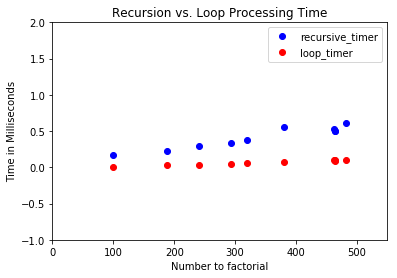

In [28]:
# Create plot of time versus complexity of array
plt.plot(df['number'], df['recursive_timer'], 'bo')
plt.plot(df['number'], df['loop_timer'], 'ro')

# Label Graph
plt.ylabel('Time in Milliseconds')
plt.xlabel('Number to factorial')
plt.title('Recursion vs. Loop Processing Time')

#Create Legend and define axes
plt.legend()
plt.axis([0, 550, -1, 2])
plt.show()

The resulting graphic for all tests performed as part of this assigment.  
The algorithm operates extremely quickly and hardly takes any time to run.

**Recursion does appear to be slower than the loop timer, which is consistent with expectations.**

Data engineers are required to consider how to ensure that an operation can perform effectively at scale.  This exercise helps to reinforce the value of measuring and testing algorithms as they scale.